### Titanic project 
### author  Fahad Saeed alqahtani 


In [25]:
#import needed libarys 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.plotting import figure, show, output_file
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Step 1: Cleaning the data


In [26]:
# ?sns.catplot();


In [27]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


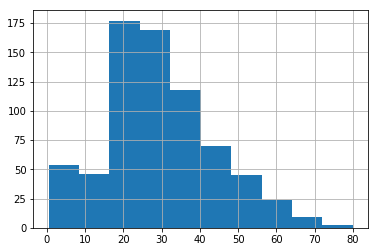

In [28]:
# histogram for age to see distrbution of data 
titanic.Age.hist();


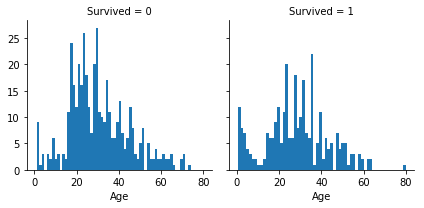

In [29]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=60);


In [30]:
#check for the null value 
nullvalue=titanic.isnull().sum()
nullvalue

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

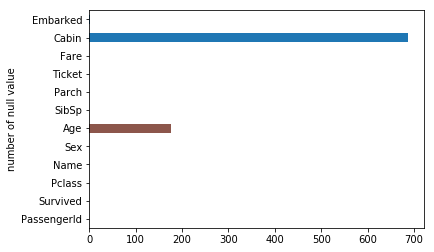

In [31]:
# cabins has the must null value  687 empty cell
nullvalue.plot(kind='barh');
plt.ylabel('number of null value');
# plt.xticks(color='white');
# plt.yticks(color='white');

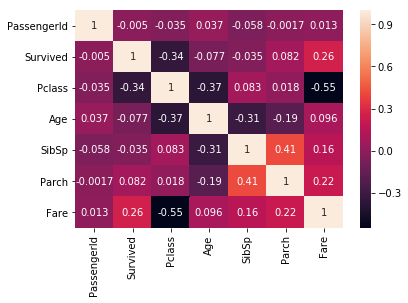

In [32]:
# see the coreltion using heatmap 
sns.heatmap(titanic.corr(),annot=True)
plt.yticks(rotation = 0);

In [33]:
# 3. Delete all rows where `Embarked` is empty
# titanic.Embarked= titanic['Embarked'].notnull() 
# instaed I replace  the null value  with S
titanic['Embarked'].fillna('S', inplace=True)
#replace the null value in Cabin with '**¯\\_(ツ)_/¯**'
titanic['Cabin'].fillna('**¯\\_(ツ)_/¯**', inplace=True)

# replace the Age null values 
titanic['Age'] = titanic.groupby(["Sex", 'Pclass'])["Age"]\
.transform(lambda x: x.fillna(x.mean()))

titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

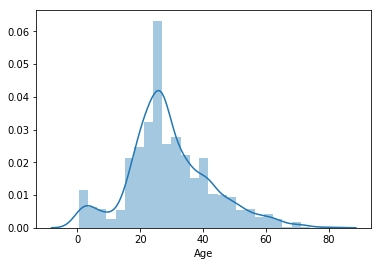

In [34]:
sns.distplot(titanic['Age'],kde=True);


## Step 2: Feature extraction


In [35]:
#two columns that pertain to how many family members are on the boat
titanic['FamilyCount'] = titanic.SibSp + titanic.Parch


In [36]:
# to find reverend in passengers  

# str.find will look if there any Rev in the name  and will use it like array index -1 if none Rev
titanic['IsReverend']=titanic['Name'].str.find('Rev')
# Replace -1 with zeros 
titanic.IsReverend =titanic.IsReverend.replace(-1,0)
# Look for rev and give them 1 
titanic['IsReverend'].values[titanic['IsReverend'].values > 0] = 1


In [37]:
# make dummy coulmns 
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,1


In [38]:
# make dummy coulmns 
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,0,0,1,0,0,1


In [39]:
# # 1. What was the survival rate overall?

# surviulrate = titanic.Survived.sum() / len(titanic['Survived'])*100
# print(f'survival rate overall {surviulrate}%')

In [40]:
# create categories bassed on age
binss=[0, 5, 12, 18, 35, 60, 100]
label_names = ['Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']
titanic['Age_group']= pd.cut(titanic.Age,bins=binss,labels=label_names)


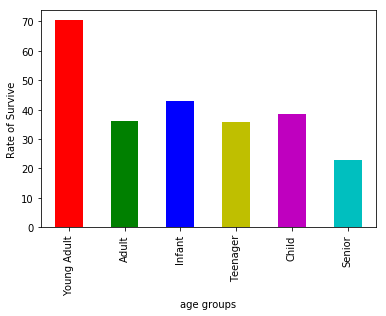

In [41]:
#creat Age_group bar graph 
cage=titanic.pivot_table(index="Age_group",values="Survived")*100 
my_colors = 'rgbymc'  #red, green, blue, black, etc.
cage.plot(kind='bar',color=my_colors,legend=False);
plt.ylabel('Rate of Survive');
plt.xlabel('age groups');



In [42]:
# make dummy columns
titanic = pd.get_dummies(titanic, columns=['Age_group'])


In [43]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'


# Lets create a new column for the titles
titanic['Title'] = titanic['Name'].map(lambda x: get_title(x))
# make dummy columns
titanic = pd.get_dummies(titanic, columns=['Title'])


In [50]:
# I have a column called IsReverend so no need for this column
titanic = titanic.drop('Title_Rev', 1)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_group_Infant', 'Age_group_Child', 'Age_group_Teenager',
       'Age_group_Young Adult', 'Age_group_Adult', 'Age_group_Senior',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

## Step 3: Exploratory analysis


In [51]:
# what was the survival rate ?
surviul_rate = titanic.Survived.sum() / len(titanic['Survived'])*100
print(f'the survival rate overall {surviul_rate}%')

the survival rate overall 38.38383838383838%


In [67]:
#which gender fared the worse ? male  with 18.89%
sex_pivot=titanic.pivot_table(index="Sex_male",values="Survived") * 100
sex_pivot



,Survived
Sex_male,
0,74.203822
1,18.890815


In [66]:
# another way to check
sx=pd.crosstab(titanic.Sex_female,titanic.Survived, normalize='index').mul(100)
sx

Survived,0,1
Sex_female,,
0,81.109185,18.890815
1,25.796178,74.203822


In [60]:
# 3. What was the survival rate for each `Pclass`?

classs =pd.crosstab(titanic.Pclass, titanic.Survived, normalize='index').mul(100)
classs


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [68]:
# another way to check 
ss=titanic.pivot_table(index="Pclass",values="Survived") * 100
ss


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [69]:
# none of the rev survaived
titanic[(titanic.IsReverend ==1) & (titanic.Survived==1)]


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Sir,Title_the Countess


In [70]:
# I think it`s not the ship captin  the titnic captin was Edward John Smith and he is not in the lis 
capt=titanic.loc[titanic['Title_Capt']==1]
capt


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Sir,Title_the Countess
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯** ? 29.985444

pd.crosstab(titanic.Cabin, titanic.Survived, normalize='index').mul(100)

Survived,0,1
Cabin,,
**¯\_(ツ)_/¯**,70.014556,29.985444
A10,100.000000,0.000000
A14,100.000000,0.000000
A16,0.000000,100.000000
A19,100.000000,0.000000
A20,0.000000,100.000000
A23,0.000000,100.000000
A24,100.000000,0.000000
A26,0.000000,100.000000


In [75]:
# 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯** ? 29.985444

cab=titanic.pivot_table(index="Cabin",values="Survived") * 100
cab

,Survived
Cabin,
**¯\_(ツ)_/¯**,29.985444
A10,0.000000
A14,0.000000
A16,100.000000
A19,0.000000
A20,100.000000
A23,100.000000
A24,0.000000
A26,100.000000


In [76]:
# I replaced the null value  
pd.crosstab(titanic.Age, titanic.Survived, normalize='index').mul(100)





Survived,0,1
Age,,
0.42,0.000000,100.000000
0.67,0.000000,100.000000
0.75,0.000000,100.000000
0.83,0.000000,100.000000
0.92,0.000000,100.000000
1.00,28.571429,71.428571
2.00,70.000000,30.000000
3.00,16.666667,83.333333
4.00,30.000000,70.000000


In [77]:

Ag=titanic.pivot_table(index="Age",values="Survived") * 100
Ag

,Survived
Age,
0.42,100.000000
0.67,100.000000
0.75,100.000000
0.83,100.000000
0.92,100.000000
1.00,71.428571
2.00,30.000000
3.00,83.333333
4.00,70.000000


In [79]:
# 7. What is the survival rate for each port of embarkation?

n =pd.crosstab([titanic.Embarked_C, titanic.Embarked_Q,titanic.Embarked_S], titanic.Survived ,normalize='index').mul(100)
n


Survived                                  0          1
Embarked_C Embarked_Q Embarked_S                      
0          0          1           66.099071  33.900929
           1          0           61.038961  38.961039
1          0          0           44.642857  55.357143

In [81]:
# 7. What is the survival rate for each port of embarkation?

Ag=titanic.pivot_table(index=["Embarked_C","Embarked_Q","Embarked_S"],values="Survived") * 100
Ag

Survived
Embarked_C Embarked_Q Embarked_S           
0          0          1           33.900929
           1          0           38.961039
1          0          0           55.357143

In [82]:
# 8. What is the survival rate for children (under 12) in each `Pclass`?
under12 = titanic[titanic['Age']< 12].groupby('Pclass')['Survived'].sum()/titanic[titanic['Age']< 12].groupby('Pclass')['PassengerId'].count() * 100
under12


Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [83]:
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

titanic[titanic['Survived']==0].sort_values('Fare', ascending=False)
print(' Mr. Charles Alexander had ticket cost 263.0000  and die ):')

 Mr. Charles Alexander had ticket cost 263.0000  and die ):


In [84]:
# 11. Does having family on the boat help or hurt your chances of survival? helps if they are not more than 6 (;
survivalRateByFamily = titanic.groupby('FamilyCount')['Survived'].sum()/titanic[titanic['FamilyCount']>=1].groupby('FamilyCount')['PassengerId'].count() * 100
survivalRateByFamily

FamilyCount
0           NaN
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [85]:
# 11. Does having family on the boat help or hurt your chances of survival? helps if they are not more than 6 (;

survivalRatewithoutFamily = titanic.groupby('FamilyCount')['Survived'].sum()/titanic[titanic['FamilyCount']==0].groupby('FamilyCount')['PassengerId'].count() * 100
survivalRatewithoutFamily 

FamilyCount
0     30.353818
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
10          NaN
dtype: float64

## Step 4: Plotting


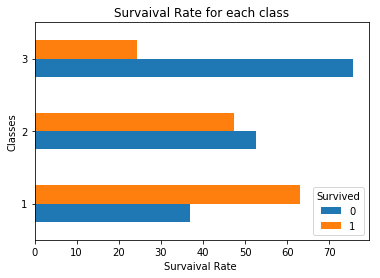

In [86]:
# Survaival Rate for each class
classs.plot(kind='barh');
plt.title('Survaival Rate for each class')
plt.ylabel('Classes');
plt.xlabel('Survaival Rate ');

# plt.xticks(color='white');
# plt.yticks(color='white');


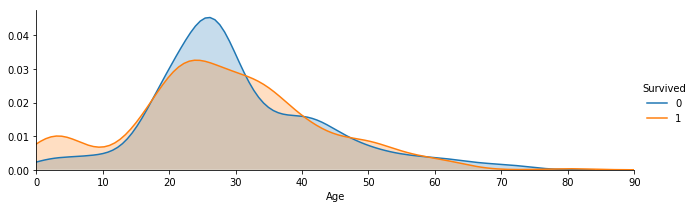

In [88]:
ageclass = sns.FacetGrid(titanic, hue='Survived', aspect=3, legend_out=True)
ageclass.map(sns.kdeplot, "Age", shade=True).add_legend()
ageclass.set(xlim=(0, 90));


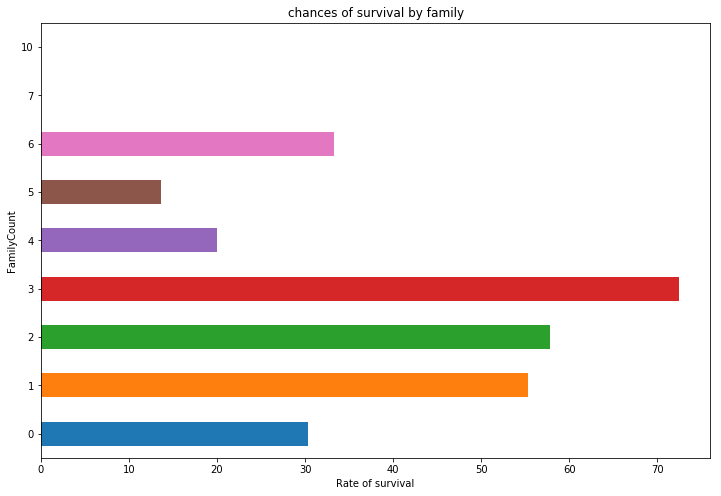

In [89]:
# 'chances of survival by family
s = titanic.groupby('FamilyCount')['Survived'].sum()/titanic.groupby('FamilyCount')['PassengerId'].count() * 100

plt.title('chances of survival by family');
plt.xlabel('Rate of survival')
plt.ylabel('family  count')

# plt.xticks(color='white')
# plt.yticks(color='white')


s.plot(kind='barh',figsize=(12,8));


Text(0,0.5,'Class')

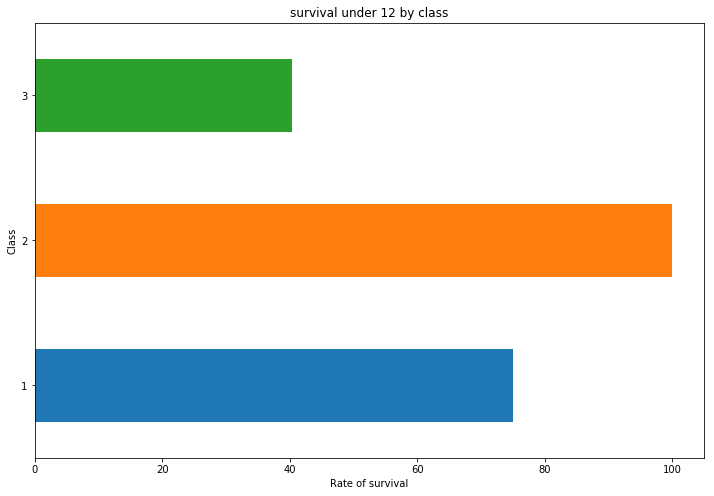

In [90]:
# urvival under 12 by class
under12.plot(kind='barh',figsize=(12,8));
plt.title('survival under 12 by class');
plt.xlabel('Rate of survival')
plt.ylabel('Class')

# plt.xticks(color='white')
# plt.yticks(color='white');



Text(0,0.5,'survival rate')

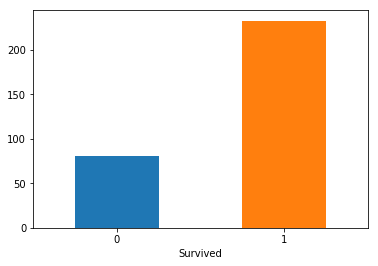

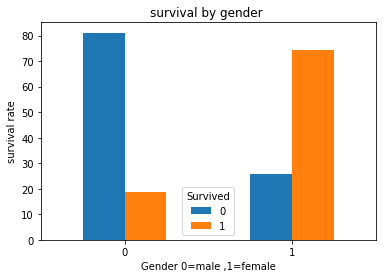

In [91]:
# two barchart to show the survival rate and count 
titanic.groupby('Survived')['Sex_female'].sum().plot(kind='bar')

plt.xticks(rotation=0);
sx.plot(kind='bar')
plt.xticks(rotation=0);
plt.title('survival by gender ',color='k');
plt.xlabel('Gender 0=male ,1=female',color='k')
plt.ylabel('survival rate')

# plt.xticks(color='white')
# plt.yticks(color='white');


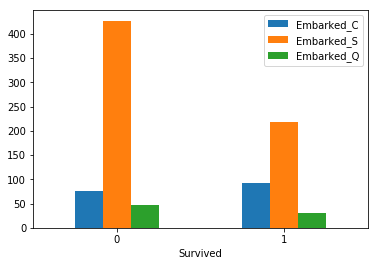

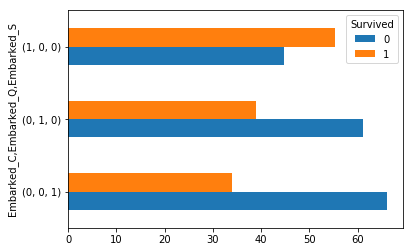

In [92]:
# two barchart to show the survival rate and count 

titanic.groupby('Survived')['Embarked_C','Embarked_S' ,'Embarked_Q'].sum().plot(kind='bar')
plt.xticks(rotation=0);
n.plot(kind='barh');


In [93]:
titanic['Fare'].skew()

4.787316519674893

In [94]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Sex_female,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Sir,Title_the Countess
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658,-0.040143,0.012698,-0.042939,...,0.008759,-0.026151,-0.073110,0.042506,-0.009904,0.038850,0.011245,-0.000261,0.020070,0.040921
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,0.016639,-0.064988,0.543351,...,0.011329,0.085221,0.327093,0.060095,0.042470,-0.549199,0.339040,0.042470,0.042470,0.042470
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,0.065997,-0.030413,-0.131900,...,-0.074282,0.082081,-0.000576,-0.074282,-0.052496,0.142698,-0.149209,-0.012381,-0.052496,-0.052496
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,-0.262041,0.085902,-0.112851,...,0.068541,-0.368335,-0.282539,-0.019005,-0.013431,0.207776,0.166730,-0.003330,0.049702,0.009297
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.890712,-0.026622,0.114631,...,-0.022508,0.349559,0.087932,-0.022508,-0.015907,-0.250489,0.063407,-0.015907,0.014507,-0.015907
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.783111,-0.021967,0.245489,...,-0.022467,0.267344,0.105567,-0.022467,-0.015878,-0.333905,0.225852,-0.015878,-0.015878,-0.015878
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.217138,-0.023031,0.182333,...,-0.003514,0.010908,0.118271,0.025974,0.025037,-0.183766,0.105203,-0.012961,0.016687,0.036645
FamilyCount,-0.040143,0.016639,0.065997,-0.262041,0.890712,0.783111,0.217138,1.000000,-0.029170,0.200988,...,-0.026608,0.372472,0.112838,-0.026608,-0.018804,-0.338014,0.156168,-0.018804,0.001983,-0.018804
IsReverend,0.012698,-0.064988,-0.030413,0.085902,-0.026622,-0.021967,-0.023031,-0.029170,1.000000,-0.060741,...,-0.003905,-0.017851,-0.041717,-0.003905,-0.002760,-0.096808,-0.033262,-0.002760,-0.002760,-0.002760
Sex_female,-0.042939,0.543351,-0.131900,-0.112851,0.114631,0.245489,0.182333,0.200988,-0.060741,1.000000,...,-0.034990,-0.159934,0.686808,0.064296,0.045439,-0.867334,0.547600,0.045439,-0.024728,0.045439


In [95]:
titanic['Fare'].kurt()


33.39814088089868

In [96]:
titanic.std()


PassengerId              257.353842
Survived                   0.486592
Pclass                     0.836071
Age                       13.281103
SibSp                      1.102743
Parch                      0.806057
Fare                      49.693429
FamilyCount                1.613459
IsReverend                 0.081830
Sex_female                 0.477990
Sex_male                   0.477990
Embarked_C                 0.391372
Embarked_Q                 0.281141
Embarked_S                 0.446751
Age_group_Infant           0.216787
Age_group_Child            0.165232
Age_group_Teenager         0.269207
Age_group_Young Adult      0.494332
Age_group_Adult            0.428790
Age_group_Senior           0.155270
Title_Capt                 0.033501
Title_Col                  0.047351
Title_Don                  0.033501
Title_Dr                   0.088337
Title_Jonkheer             0.033501
Title_Lady                 0.033501
Title_Major                0.047351
Title_Master               0

In [ ]:
titanic.describe()

In [97]:
# the oldest person  died? 
titanic[titanic['Survived']==0].sort_values('Age', ascending=False) 


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Sir,Title_the Countess
851,852,0,3,"Svensson, Mr. Johan",74.0,0,0,347060,7.7750,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
493,494,0,1,"Artagaveytia, Mr. Ramon",71.0,0,0,PC 17609,49.5042,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
96,97,0,1,"Goldschmidt, Mr. George B",71.0,0,0,PC 17754,34.6542,A5,...,0,0,0,0,0,1,0,0,0,0
116,117,0,3,"Connors, Mr. Patrick",70.5,0,0,370369,7.7500,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0000,B22,...,0,0,0,0,0,0,0,0,0,0
672,673,0,2,"Mitchell, Mr. Henry Michael",70.0,0,0,C.A. 24580,10.5000,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
33,34,0,2,"Wheadon, Mr. Edward H",66.0,0,0,C.A. 24579,10.5000,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
456,457,0,1,"Millet, Mr. Francis Davis",65.0,0,0,13509,26.5500,E38,...,0,0,0,0,0,1,0,0,0,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",65.0,0,1,113509,61.9792,B30,...,0,0,0,0,0,1,0,0,0,0
280,281,0,3,"Duane, Mr. Frank",65.0,0,0,336439,7.7500,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0


In [98]:
# the youngest person  survived ? 

titanic[titanic['Survived']==1].sort_values('Age', ascending=False)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Sir,Title_the Countess
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",80.00,0,0,27042,30.0000,A23,...,0,0,0,0,0,1,0,0,0,0
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",63.00,1,0,13502,77.9583,D7,...,0,0,1,0,0,0,0,0,0,0
483,484,1,3,"Turkula, Mrs. (Hedwig)",63.00,0,0,4134,9.5875,**¯\_(ツ)_/¯**,...,0,0,0,0,0,0,1,0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.00,0,0,113572,80.0000,B28,...,0,0,0,0,0,0,1,0,0,0
570,571,1,2,"Harris, Mr. George",62.00,0,0,S.W./PP 752,10.5000,**¯\_(ツ)_/¯**,...,0,0,0,0,0,1,0,0,0,0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.00,1,0,110813,75.2500,D37,...,0,0,0,0,0,0,1,0,0,0
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",60.00,1,1,13567,79.2000,B41,...,0,0,0,0,0,1,0,0,0,0
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.00,0,1,PC 17582,153.4625,C125,...,0,0,0,0,0,0,1,0,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.00,0,0,113783,26.5500,C103,...,0,0,1,0,0,0,0,0,0,0
195,196,1,1,"Lurette, Miss. Elise",58.00,0,0,PC 17569,146.5208,B80,...,0,0,1,0,0,0,0,0,0,0


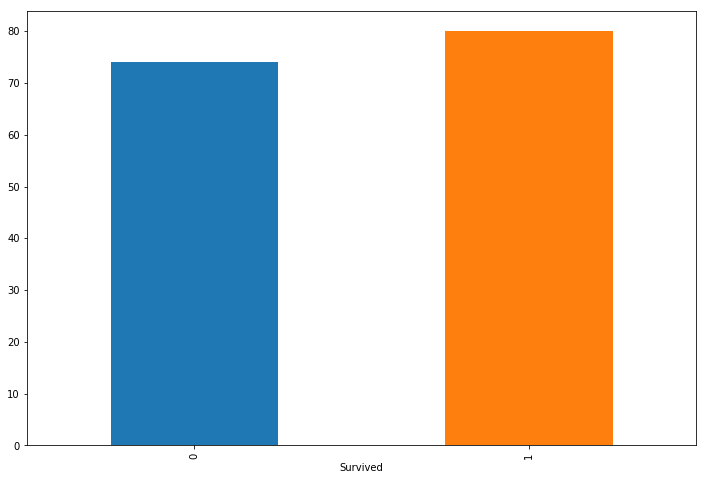

In [99]:
titanic.groupby('Survived')['Age'].max().plot(kind='bar',figsize=(12,8));


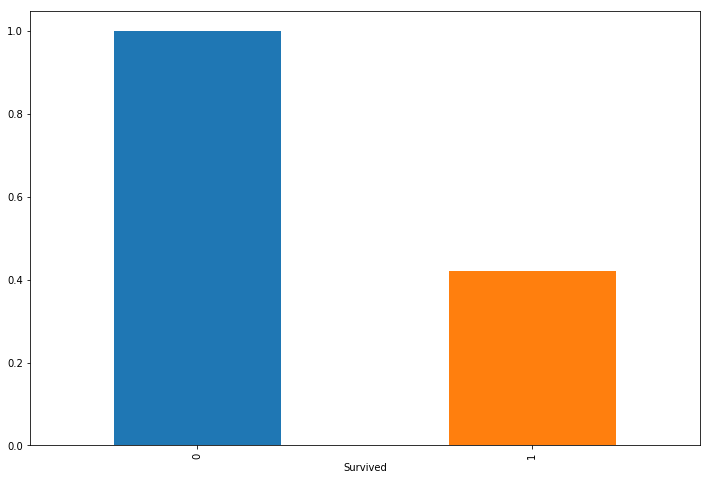

In [101]:
titanic.groupby('Survived')['Age'].min().plot(kind='bar',figsize=(12,8)).plot(kind='bar');


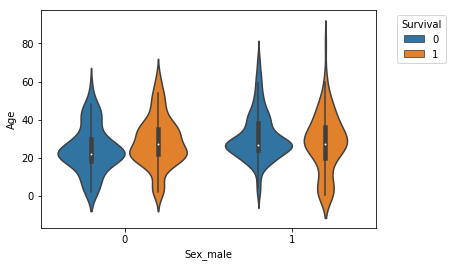

In [103]:
# to show the age for survival both m/w 
sns.violinplot(x=titanic.Sex_male, y=titanic.Age, hue="Survived", data=titanic,legend=False)
# but the legend out side the graph
plt.legend(title='Survival', bbox_to_anchor=(1.05, 1),loc='upper left');




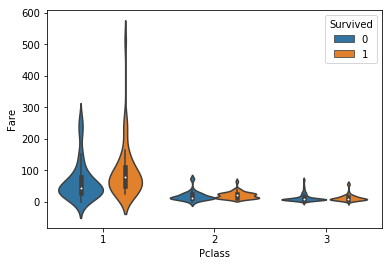

In [104]:
sns.violinplot(x=titanic.Pclass, y=titanic.Fare, hue=titanic.Survived, data=titanic);


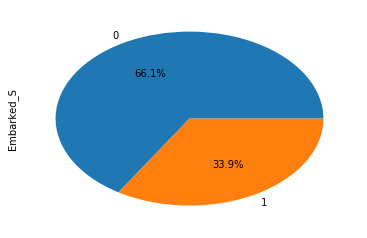

In [105]:
# pie chart to show the prcentege of survival  for Embarked_S soory ):
titanic.groupby('Survived')['Embarked_S'].sum().plot(kind='pie',autopct='%1.1f%%'); 


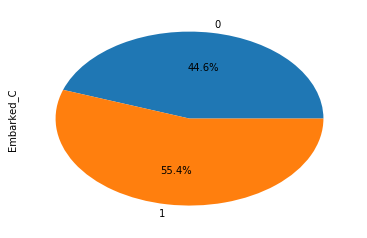

In [106]:
# pie chart to show the prcentege of survival  for Embarked_C

titanic.groupby('Survived')['Embarked_C'].sum().plot(kind='pie',autopct='%1.1f%%');


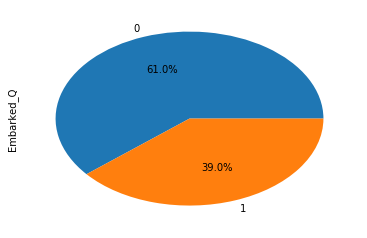

In [107]:
# pie chart to show the prcentege of survival  for Embarked_Q

titanic.groupby('Survived')['Embarked_Q'].sum().plot(kind='pie',autopct='%1.1f%%');


In [121]:
# to check for rev survival using Bokeh libary 
output_file('vbar.html')

p = figure(plot_width=400, plot_height=400)
p.vbar(x=titanic.Survived, width=0.5, bottom=0,
       top=titanic.IsReverend, color="firebrick")

show(p)

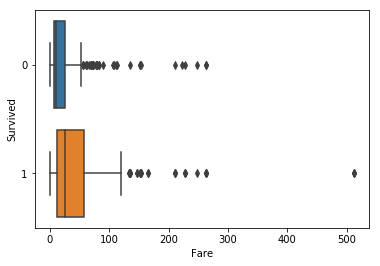

In [110]:
# boxplot to see survivar and fare  we can see the outliers 
sns.boxplot(x="Fare", y="Survived", data=titanic, orient='h');


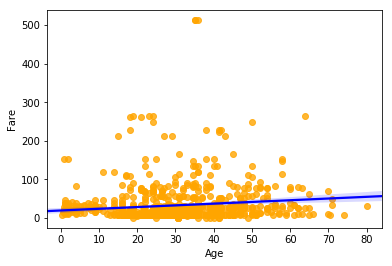

In [111]:
# see the fair and age 
sns.regplot(data=titanic,
         x=titanic.Age,
             y=titanic.Fare,scatter_kws={"color": "orange"}, line_kws={"color": "blue"});


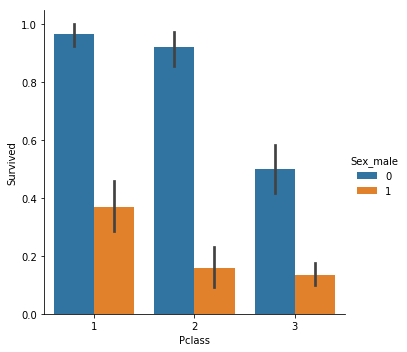

In [114]:
g = sns.catplot("Pclass", 'Survived', "Sex_male", data=titanic, kind="bar")


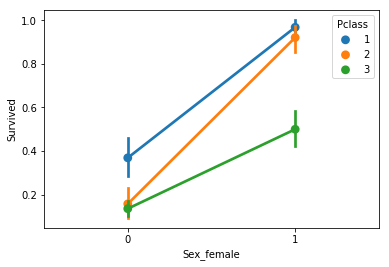

In [115]:
sns.pointplot(x = "Sex_female", y = "Survived", hue = "Pclass", data = titanic);

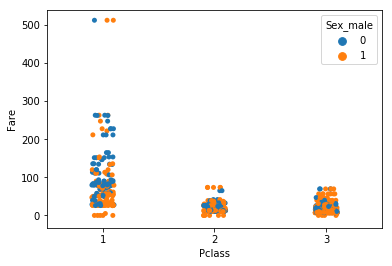

In [116]:
sns.stripplot(x=titanic.Pclass,y=titanic.Fare,hue='Sex_male',jitter=True,data=titanic);


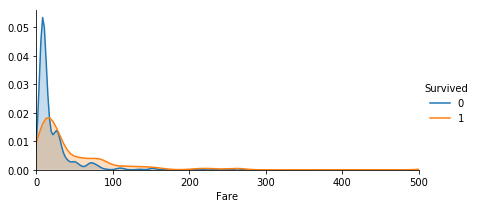

In [118]:

faresurvival = sns.FacetGrid(titanic, hue="Survived", aspect=2)
faresurvival.map(sns.kdeplot, "Fare", shade=True).add_legend()
faresurvival.set(xlim=(0, 500));

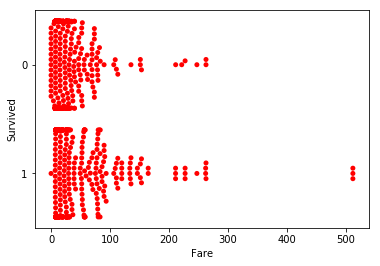

In [119]:
sns.swarmplot(x ="Fare", y='Survived', data=titanic, orient='h', color='r',);

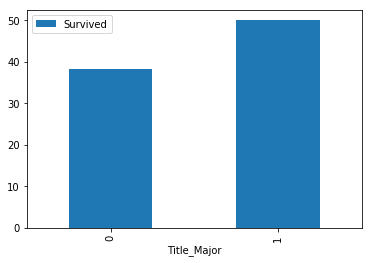

In [142]:
# survival rate for majors 
major=titanic.pivot_table(index="Title_Major",values="Survived") * 100
major.plot(kind='bar'); 


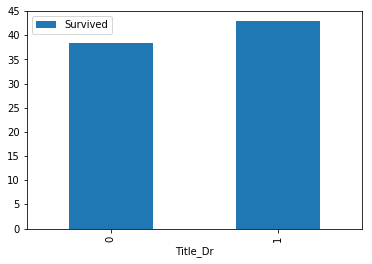

In [143]:
# survival rate for dactors  
dr=titanic.pivot_table(index="Title_Dr",values="Survived") * 100
dr.plot(kind='bar'); 


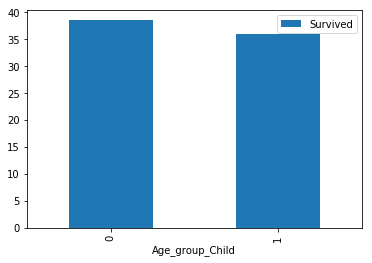

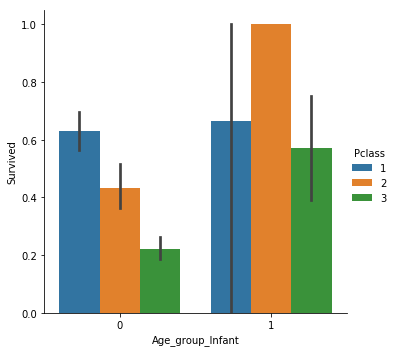

In [162]:
# survival rate for children  
child=titanic.pivot_table(index="Age_group_Child",values="Survived") * 100
child.plot(kind='bar'); 

# for infait
sns.catplot("Age_group_Infant", 'Survived', "Pclass", data=titanic, kind="bar");


